In [5]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt


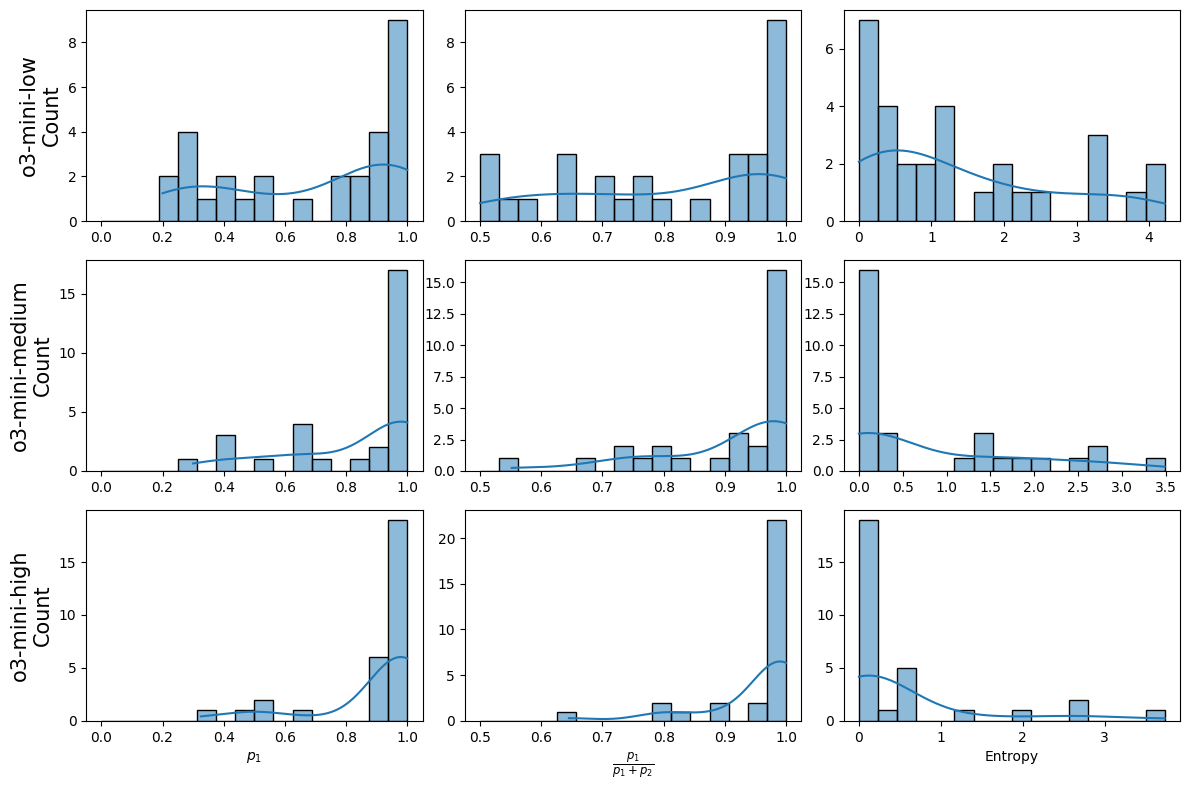

In [7]:

def sort_key(file_name):
    match = re.search(r'(\d+)\.csv$', file_name)
    return int(match.group(1)) if match else -1

def process_folder(folder_path):
    csv_files = sorted(glob.glob(f"{folder_path}/*.csv"), key=sort_key)
    results = []

    for csv in csv_files:
        df = pd.read_csv(csv)
        unique_answers = df['answer'].nunique()
        value_counts = df['answer'].value_counts(normalize=True)
        p_max = value_counts.max()
        p_second = value_counts.nlargest(2).iloc[1] if len(value_counts) > 1 else 0
        entropy = -(value_counts * np.log2(value_counts)).sum()
        file_index = int(re.search(r'(\d+)\.csv$', csv).group(1))
        results.append({'file_index': file_index, 'unique_answers': unique_answers, 'p_max': p_max, 'p_second': p_second, 'entropy': entropy})

    results_df = pd.DataFrame(results)
    return results_df

# Process each folder
folders = ["../../aime24/o3minilow-aime24-vote", "../../aime24/o3minimedium-aime24-vote", "../../aime24/o3minihigh-aime24-vote"]
all_results = []

for folder in folders:
    folder_results = process_folder(folder)
    folder_results['model'] = folder.split('/')[-1]
    all_results.append(folder_results)

# Combine all results into a single dataframe
combined_results_df = pd.concat(all_results, ignore_index=True)

# Plot the results
plt.figure(figsize=(12, 8))
# plt.suptitle('Distribution of Probabilities and Entropy for Different Models', fontsize=16)

for i, model in enumerate(folders):
    model_name = model.split('/')[-1]
    model_df = combined_results_df[combined_results_df['model'] == model_name]

    model_name2 = {
        "o3minilow": "o3-mini-low",
        "o3minimedium":"o3-mini-medium",
        "o3minihigh": "o3-mini-high",
    }[model_name.split('-')[0]]

    plt.subplot(3, 3, 3*i + 1)
    sns.histplot(model_df['p_max'], kde=True, binrange=(0, 1), bins=16)

    if model_name2 == "o3-mini-high":
        plt.xlabel(r"$p_1$")
    else:
        plt.xlabel(None)
    plt.ylabel(f"{model_name2}\nCount", size=15)
    #plt.title(model_name2)

    plt.subplot(3, 3, 3*i + 2)
    sns.histplot(model_df['p_max'] / ( model_df['p_max'] + model_df['p_second'] ), kde=True, binrange=(0.5, 1), bins=16)
    if model_name2 == "o3-mini-high":
        plt.xlabel(r"$\frac{p_1}{p_1 + p_2}$", fontsize=12)
    else:
        plt.xlabel(None)
    #plt.title(model_name2)
    plt.ylabel(None)    


    plt.subplot(3, 3, 3*i + 3)
    sns.histplot(model_df['entropy'], kde=True, bins=16)
    #plt.title(model_name2)

    if model_name2 == "o3-mini-high":
        plt.xlabel("Entropy")
    else:
        plt.xlabel(None)
    plt.ylabel(None)     

plt.tight_layout()
plt.savefig("./Untitled.pdf")
plt.show()


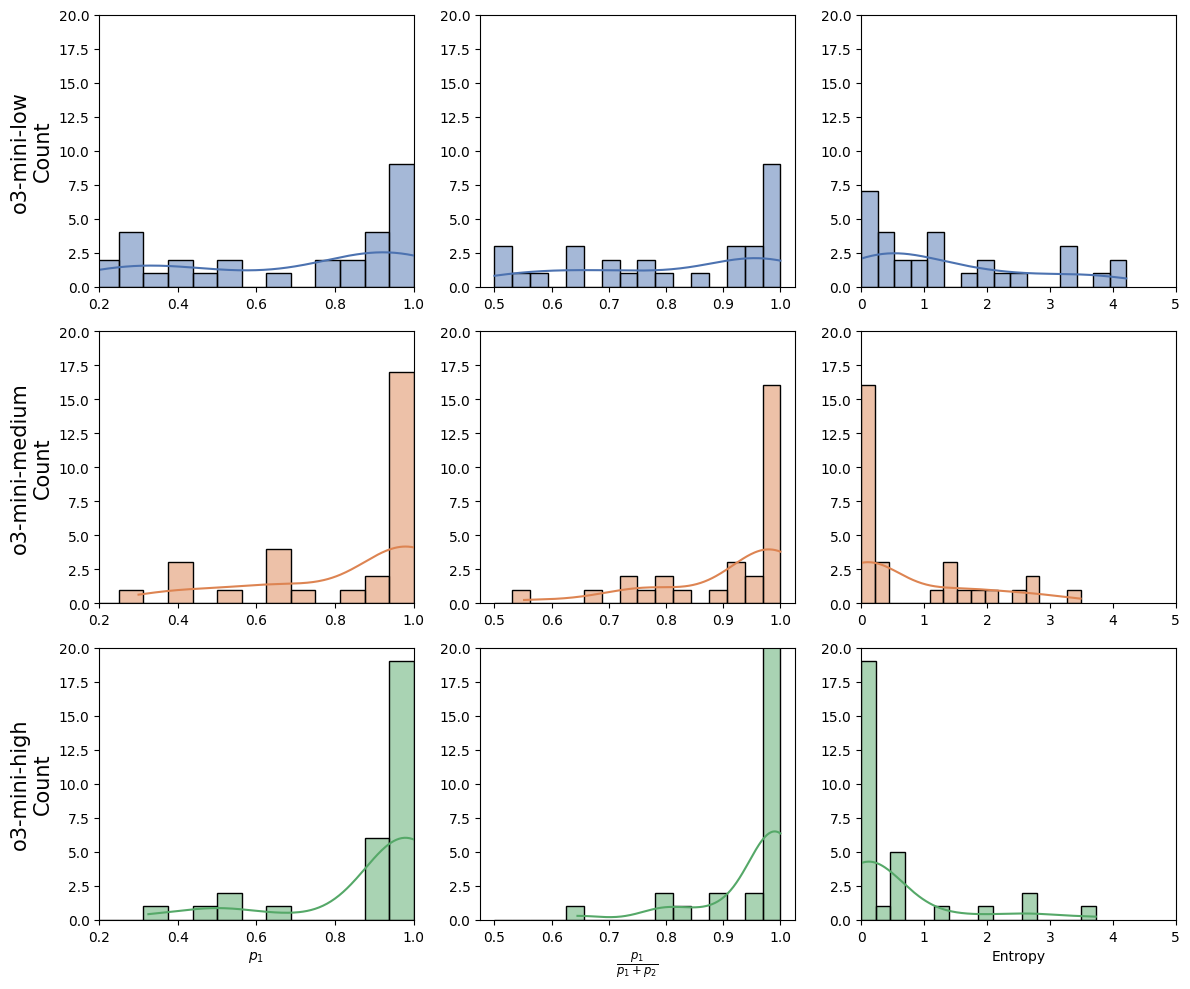

In [18]:
def sort_key(file_name):
    match = re.search(r'(\d+)\.csv$', file_name)
    return int(match.group(1)) if match else -1

def process_folder(folder_path):
    csv_files = sorted(glob.glob(f"{folder_path}/*.csv"), key=sort_key)
    results = []

    for csv in csv_files:
        df = pd.read_csv(csv)
        unique_answers = df['answer'].nunique()
        value_counts = df['answer'].value_counts(normalize=True)
        p_max = value_counts.max()
        p_second = value_counts.nlargest(2).iloc[1] if len(value_counts) > 1 else 0
        entropy = -(value_counts * np.log2(value_counts)).sum()
        file_index = int(re.search(r'(\d+)\.csv$', csv).group(1))
        results.append({'file_index': file_index, 'unique_answers': unique_answers, 'p_max': p_max, 'p_second': p_second, 'entropy': entropy})

    results_df = pd.DataFrame(results)
    return results_df

# Process each folder
folders = ["../../aime24/o3minilow-aime24-vote", "../../aime24/o3minimedium-aime24-vote", "../../aime24/o3minihigh-aime24-vote"]
all_results = []

for folder in folders:
    folder_results = process_folder(folder)
    folder_results['model'] = folder.split('/')[-1]
    all_results.append(folder_results)

# Combine all results into a single dataframe
combined_results_df = pd.concat(all_results, ignore_index=True)

# Plot the results
plt.figure(figsize=(12, 10))
# plt.suptitle('Distribution of Probabilities and Entropy for Different Models', fontsize=16)

palette = sns.color_palette("deep", len(folders))

for i, model in enumerate(folders):
    model_name = model.split('/')[-1]
    model_df = combined_results_df[combined_results_df['model'] == model_name]

    model_name2 = {
        "o3minilow": "o3-mini-low",
        "o3minimedium":"o3-mini-medium",
        "o3minihigh": "o3-mini-high",
    }[model_name.split('-')[0]]

    color = palette[i]  # Assign a unique color to each model

    plt.subplot(3, 3, 3*i + 1)
    sns.histplot(model_df['p_max'], kde=True, binrange=(0, 1), bins=16, color=color)
    plt.ylim(0, 20)  # Set y-axis to 0-20 for the first column
    plt.xlim(0.2,1)

    if model_name2 == "o3-mini-high":
        plt.xlabel(r"$p_1$")
    else:
        plt.xlabel(None)
    plt.ylabel(f"{model_name2}\nCount", size=15)

    plt.subplot(3, 3, 3*i + 2)
    sns.histplot(model_df['p_max'] / ( model_df['p_max'] + model_df['p_second'] ), kde=True, binrange=(0.5, 1), bins=16, color=color)
    plt.ylim(0, 20)  # Set y-axis to 0-20 for the second column
    if model_name2 == "o3-mini-high":
        plt.xlabel(r"$\frac{p_1}{p_1 + p_2}$", fontsize=12)
    else:
        plt.xlabel(None)
    plt.ylabel(None)

    plt.subplot(3, 3, 3*i + 3)
    sns.histplot(model_df['entropy'], kde=True, bins=16, color=color)
    #sns.stripplot(x=model_df["entropy"], y=model_df["p_max"], color=color)
    plt.xlim(0, 5)  # Set y-axis to 0-4 for the last column
    plt.ylim(0, 20)
    if model_name2 == "o3-mini-high":
        plt.xlabel("Entropy")
    else:
        plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.savefig("./Untitled.pdf")
plt.show()


In [ ]:
print("""
Figure X. Distribution of probabilities and entropy for Open AI o3-mini reasoning models' responses.
We can observe most of p_1 is over 0.5, which means only one response dominates the others, and this tendency becomes evident when we are using stronger models comparing to the difficulty of benchmark. (Left).
The ratio beween p_1 to p_2 is skewed to the right, some of them .... (Middle)

Note the distribution is drawn with 40 samples.
""".strip())